In [ ]:
#課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，
#目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。

#Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
#Q2: 測試資料集是否有遺失值?
#Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，
#     並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，
#     試著說明每一個方法的差異。

In [2]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [3]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [15]:
# 把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")

In [16]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

# 資料的比數
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [ ]:
#有差異, df_train的資料有11個變數，包含survived資料。df_test則只有10個變數。


In [ ]:
#Q2: 測試資料集是否有遺失值?

In [18]:
#判斷每一個資料點，是否為空值:
print(df_test.isnull().head(418))


# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(df_test.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_test.isnull().any().sum())

     PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0          False   False  False  False  False  False  False   False  False   
1          False   False  False  False  False  False  False   False  False   
2          False   False  False  False  False  False  False   False  False   
3          False   False  False  False  False  False  False   False  False   
4          False   False  False  False  False  False  False   False  False   
..           ...     ...    ...    ...    ...    ...    ...     ...    ...   
413        False   False  False  False   True  False  False   False  False   
414        False   False  False  False  False  False  False   False  False   
415        False   False  False  False  False  False  False   False  False   
416        False   False  False  False   True  False  False   False  False   
417        False   False  False  False   True  False  False   False  False   

     Cabin  Embarked  
0     True     False  
1     True     Fa

In [19]:
#可以只顯示存在缺失值的行列，清楚地確定缺失值的狀態
# 代表有缺時的地方才顯示df_train.isnull().values==True
df_test[df_test.isnull().values==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，
        並透過圖形來做輔助判斷，補值前與後的差異，
        你覺得以這個變數而言，試著說明每一個方法的差異。

In [59]:
test=pd.DataFrame(df_test)
train=pd.DataFrame(df_train)

In [60]:
merge= test.append(train, ignore_index=True)
print(merge)

      PassengerId  Pclass                                          Name  \
0             892       3                              Kelly, Mr. James   
1             893       3              Wilkes, Mrs. James (Ellen Needs)   
2             894       2                     Myles, Mr. Thomas Francis   
3             895       3                              Wirz, Mr. Albert   
4             896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
...           ...     ...                                           ...   
1304          887       2                         Montvila, Rev. Juozas   
1305          888       1                  Graham, Miss. Margaret Edith   
1306          889       3      Johnston, Miss. Catherine Helen "Carrie"   
1307          890       1                         Behr, Mr. Karl Howell   
1308          891       3                           Dooley, Mr. Patrick   

         Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Survived  
0       male  34.5

In [42]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [45]:
# 統計 data 裡有空值的變數個數
print(merge.isnull().any().sum())

5


In [46]:
# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(merge.isnull().any())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
Survived        True
dtype: bool


29.881137667304014
14.413493211271325


/Users/wenchiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


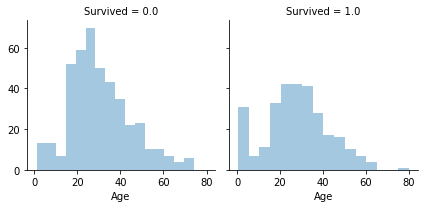

In [61]:
# 我們以  Age 為例，進行補植，補固定值
#補值前 平均值
print(merge['Age'].mean()) #age平均
print(merge['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(merge, col='Survived')
g.map(sns.distplot, 'Age', kde=False)



23.87751718869366
17.590844644704113


/Users/wenchiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


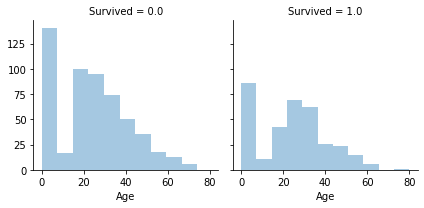

In [62]:
#補值後
merge['Age']=merge['Age'].fillna(0)
print(merge['Age'].mean())
print(merge['Age'].std()) #age標準差
merge[merge['Age'].isnull().values==True]
#補完就沒有遺失值了，但是看到這樣的補值效果，平均值上有很明顯的差異，
# 連續型用分布圖行來看
g = sns.FacetGrid(merge, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

29.881137667304014
14.413493211271325


/Users/wenchiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


29.75509549274255
14.347469886198386


/Users/wenchiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


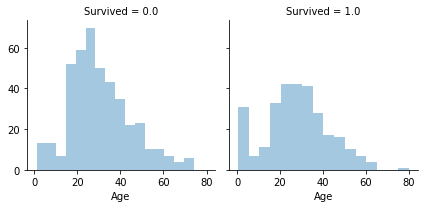

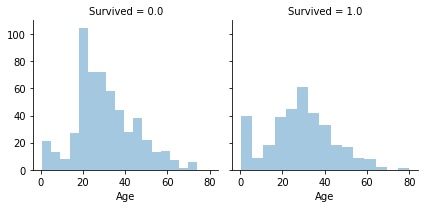

In [63]:
# 我們以  Age 為例，進行，由後往前補
#補值前 平均值
test=pd.DataFrame(df_test)
train=pd.DataFrame(df_train)
merge= test.append(train, ignore_index=True)
print(merge['Age'].mean())
print(merge['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(merge, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#補值後
merge['Age']=merge['Age'].fillna(method='pad')
print(merge['Age'].mean())
print(merge['Age'].std()) #age標準差
merge[merge['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(merge, col='Survived')
g.map(sns.distplot, 'Age', kde=False)